In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np 
import statsmodels as sm 
import seaborn as sns 
import geopandas as gpd
import descartes


from datetime import datetime

# What do the following Datasets have in common?

In [2]:
from IPython.display import HTML
HTML('<img src="data_dino.gif">')

In [3]:
from IPython.display import HTML
HTML('<img src="CloudToCircle.gif">')

In [4]:
from IPython.display import HTML
HTML('<img src="complete.gif">')

In [ ]:
!ls

### What does this teach us?

Recently, Alberto Cairo created the Datasaurus dataset which urges people to <b>"never trust summary statistics alone; always visualize your data"</b>

In [5]:
from IPython.display import HTML
HTML('<img src="AllDinosGrey_1.png">')

These 13 datasets (the Datasaurus, plus 12 others) each have the same summary statistics (x/y mean, x/y standard deviation, and Pearson's correlation) to two decimal places, while being drastically different in appearance.

In [6]:
sns.set_style("darkgrid")
# set_palette
sns.set_palette('tab10', 10)
# set_context possible contexts are 'notebook', 'paper', 'talk', 'poster' they change size of font to make more visible
# can inspect sns.plotting_context()
sns.set_context('talk')

In [27]:
#df = pd.read_csv('google_football.csv', index_col=0)
football = pd.read_csv('google_football.csv')
#df.shape
df.head()

,Region,Malaria
0,Ebonyi,100
1,Plateau,83
2,Sokoto,76
3,Kwara,75
4,Kano,75


In [8]:
dates = pd.date_range(start="May-2009", end="June-2019", freq='M')
df = df.set_index(dates)
df.head()

,Month,Ethiopia,Nigeria,Cameroon,Kenya,Uganda,South Africa,Tanzania
2009-05-31,2009-05,58,37,70,25,29,34,41
2009-06-30,2009-06,75,50,80,34,35,42,42
2009-07-31,2009-07,83,49,83,29,40,39,64
2009-08-31,2009-08,74,47,84,33,34,42,62
2009-09-30,2009-09,66,40,71,29,24,37,58


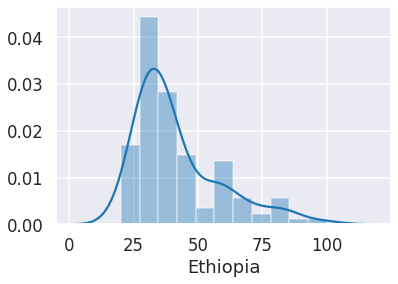

In [9]:
sns.distplot(df['Ethiopia'], kde='false')

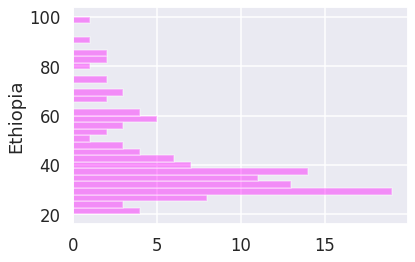

In [10]:
sns.distplot(df['Ethiopia'], kde=False, bins = 30, rug=False, color='magenta', vertical=True)

/home/akera/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



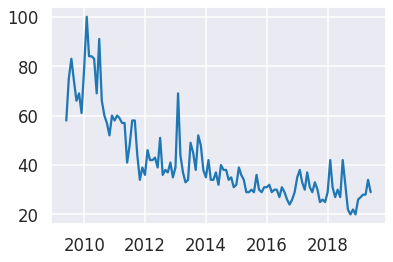

In [12]:
plt.plot(dates, df['Ethiopia'])

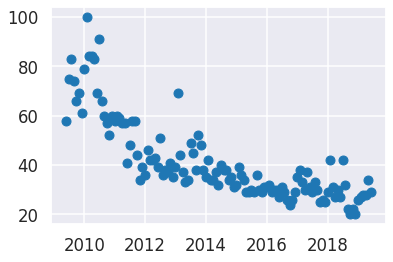

In [13]:
plt.plot(dates, df['Ethiopia'], "o")

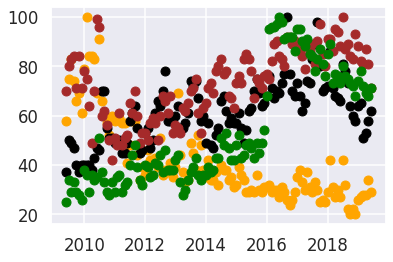

In [14]:
plt.plot(dates, df['Ethiopia'], "o", color='orange')
plt.plot(dates, df['Nigeria'], "o", color='black')
plt.plot(dates, df['Cameroon'], "o", color='brown')
plt.plot(dates, df['Kenya'], "o", color='green')

No handles with labels found to put in legend.


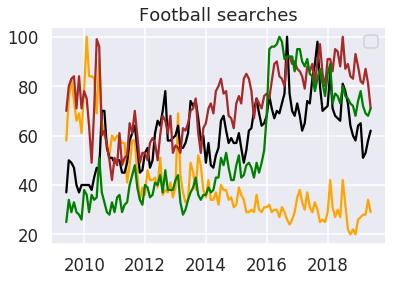

In [15]:
plt.plot(dates, df['Ethiopia'], color='orange')
plt.plot(dates, df['Nigeria'], color='black')
plt.plot(dates, df['Cameroon'], color='brown')
plt.plot(dates, df['Kenya'], color='green')
plt.title('Football searches')
plt.legend()

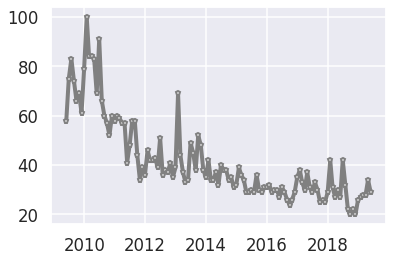

In [16]:
plt.plot(dates, df['Ethiopia'], "-p", color='gray', 
        markersize=5, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)

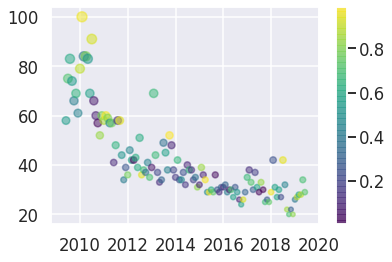

In [17]:
rng = np.random.RandomState(0)
colors = rng.rand(121)
sizes = df['Ethiopia']

plt.scatter(dates, df['Ethiopia'], c=colors, s=sizes, alpha=0.5,
           cmap='viridis')
plt.colorbar() #show color scale

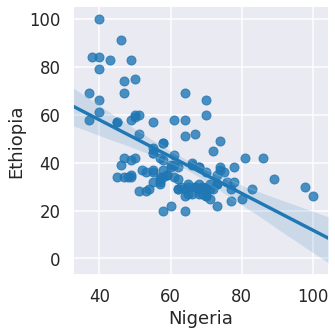

In [18]:
#Seaborn - more beautiful graphics
sns.lmplot(x='Nigeria', y='Ethiopia', data=df)


In [19]:
fp = "./nigeria/nga_admbnda_adm1_osgof_20190417.shp"

map_df = gpd.read_file(fp)

#check data 

map_df.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,4.695135,0.396543,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((7.386810307000076 6.036674993000076,..."
1,11.525443,3.113007,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62128924400002 10.94823428400002,..."
2,5.263830,0.549476,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,(POLYGON ((8.344815101000052 4.611400596000067...
3,3.595960,0.392661,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((6.932539394000059 6.71089829400006, ..."
4,13.952005,4.011018,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125057200006 12.46147679500007,..."


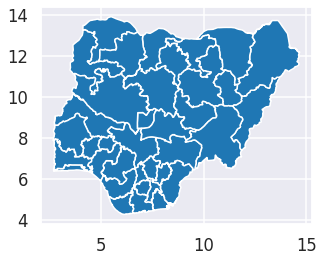

In [20]:
#preview the map

map_df.plot()

In [21]:
#let's load our Google data to join with the geodataframe
df = pd.read_csv("geoMap_nigeria.csv", header=0)
df.head()

,Region,Malaria
0,Ebonyi,100
1,Plateau,83
2,Sokoto,76
3,Kwara,75
4,Kano,75


In [22]:
#join the csv data with the geodataframe

merged = map_df.set_index('ADM1_EN').join(df.set_index('Region'))
merged.head()

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Malaria
ADM1_EN,,,,,,,,,,,,,
Abia,4.695135,0.396543,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((7.386810307000076 6.036674993000076,...",52.0
Adamawa,11.525443,3.113007,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62128924400002 10.94823428400002,...",0.0
Akwa Ibom,5.263830,0.549476,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,(POLYGON ((8.344815101000052 4.611400596000067...,68.0
Anambra,3.595960,0.392661,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((6.932539394000059 6.71089829400006, ...",62.0
Bauchi,13.952005,4.011018,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125057200006 12.46147679500007,...",64.0


/home/akera/.local/lib/python3.6/site-packages/matplotlib/colors.py:479: RuntimeWarning:

invalid value encountered in less



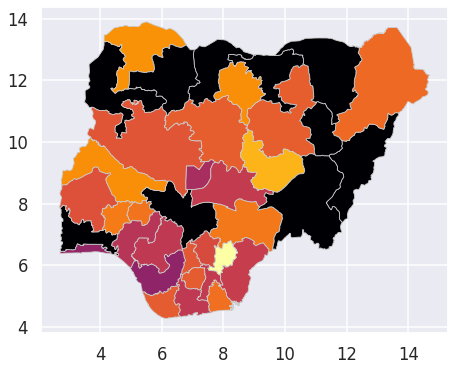

In [23]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8')


(2.0680194294500387,
 15.279330367550067,
 3.7919368028500324,
 14.375489720150043)

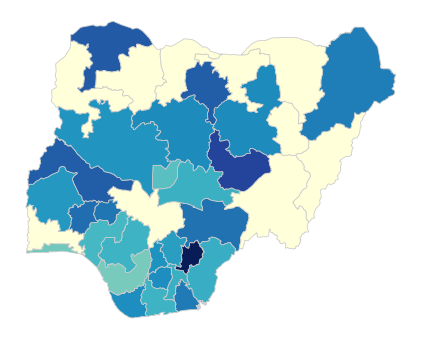

In [24]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')


#remove the axis
ax.axis('off')

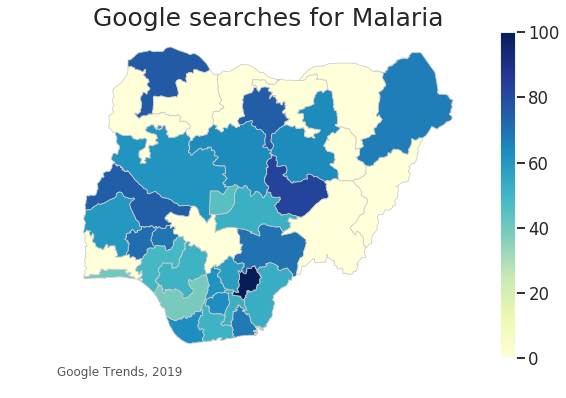

In [25]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')


#remove the axis
ax.axis('off')

#add a title

ax.set_title('Google searches for Malaria', fontdict={'fontsize': '25', 'fontweight': '3'})

#create an annotation for the data source 

ax.annotate('Google Trends, 2019', xy=(0.1, .08), 
            xycoords='figure fraction', horizontalalignment='left',
           verticalalignment='top', fontsize=12, color='#555555')


#add color legend 
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

#empty array for the data range 

sm._A = []

#add the colorbar  to the figure

cbar = fig.colorbar(sm)

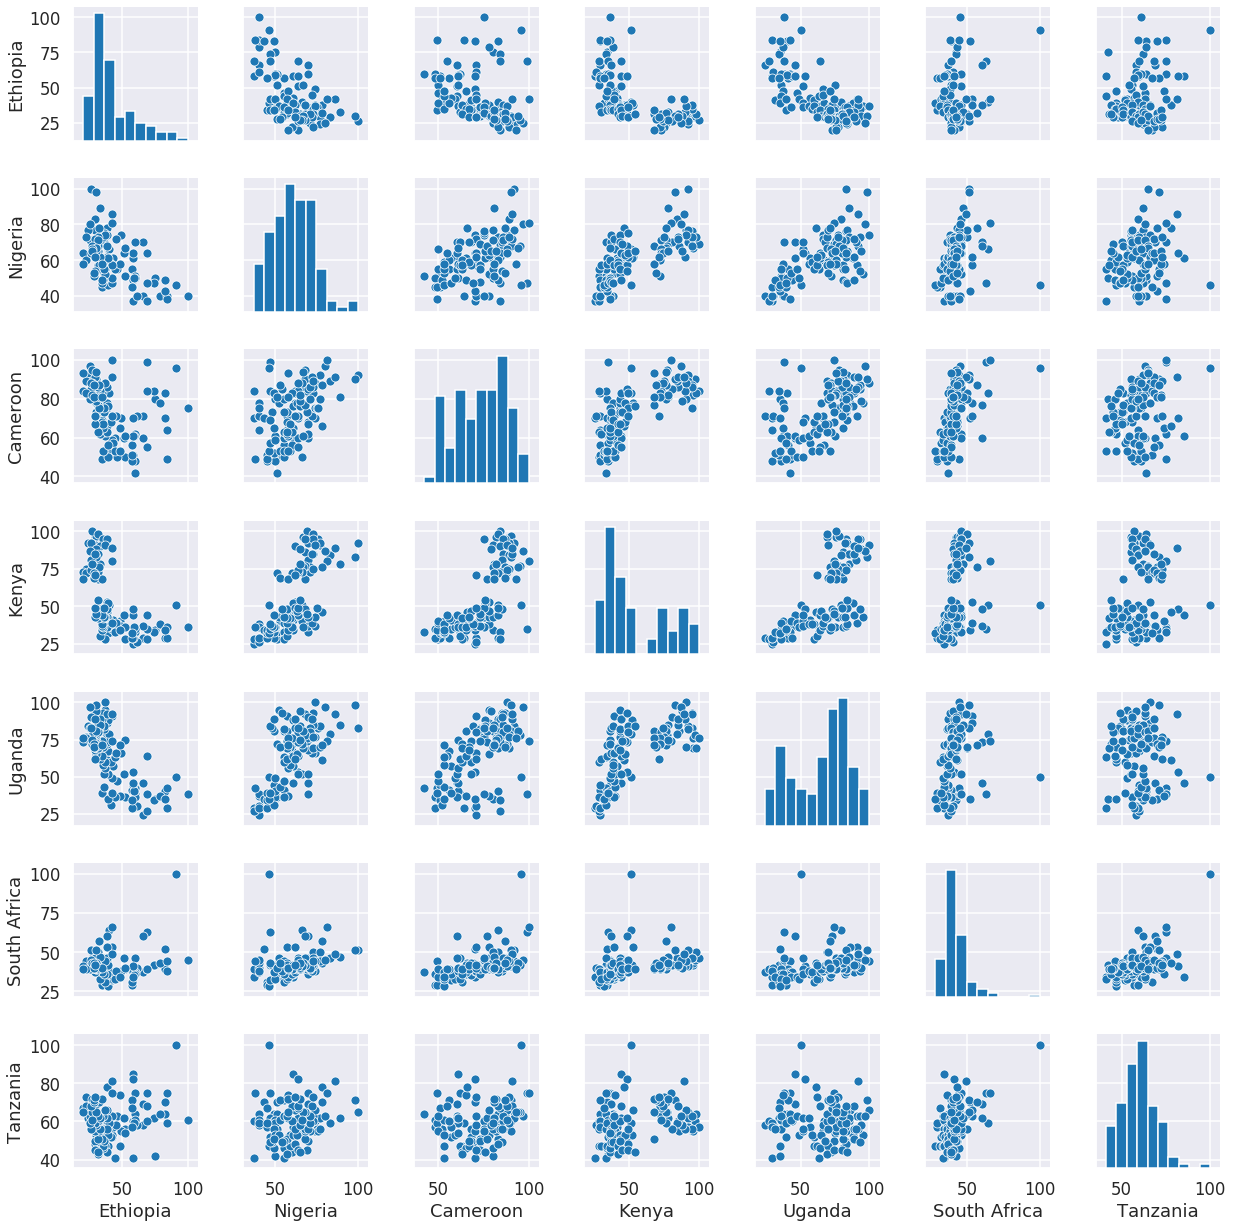

In [28]:
sns.pairplot(football)